# 15.7 Case Study: Unsupervised Machine Learning, Part 2—k-Means Clustering (1 of 2)
* **Simplest** unsupervised machine learning algorithm 
* Analyze **unlabeled samples** and **attempt to place them in clusters**
* **_k_** hyperparameter represents **number of clusters** to impose on the data
* Organizes clusters using **distance calculations** similar to the **k-NN classification** 

# 15.7 Case Study: Unsupervised Machine Learning, Part 2—k-Means Clustering (2 of 2)
* Each **cluster** is grouped around a **centroid** (cluster’s **center point**)
* Initially, the algorithm **chooses _k_ centroids at random** from **dataset’s samples**
* **Remaining samples** placed in the cluster whose **centroid is the closest** 
* **Centroids are iteratively recalculated** and **samples re-assigned** to clusters until, for all clusters, **distances** from a given centroid to the samples in its cluster are **minimized**
Results are:
	* **one-dimensional array of labels** indicating **cluster** to which **each sample belongs** 
	* **two-dimensional array of clusters' centroids** 

### Iris Dataset 
* **Iris dataset** &mdash; commonly analyzed with **classification and clustering**
	* Fisher, R.A., “The use of multiple measurements in taxonomic problems,” Annual Eugenics, 7, Part II, 179-188 (1936); also in “Contributions to Mathematical Statistics” (John Wiley, NY, 1950).
* Dataset is **labeled** &mdash; we’ll **ignore labels** to demonstrate clustering
    * Use labels later to determine **how well k-means algorithm clustered samples**
* **"Toy dataset"** &mdash; has only **150 samples** and **four features**
    * **50 samples** for each of **three _Iris_ flower species** (balanced classes)
    * **Iris setosa**, **Iris versicolor** and **Iris virginica**
    * Features: **sepal length**, **sepal width**, **petal length** and **petal width**, all measured in centimeters. 
    * **Sepals** are **larger outer parts** of each flower that protect smaller inside **petals** before buds bloom

**Iris setosa**: https://commons.wikimedia.org/wiki/File:Wild_iris_KEFJ_(9025144383).jpg.
Credit: Courtesy of Nation Park services.

<img src="./ch15images/Wild_iris_KEFJ_(9025144383).png" alt="https://commons.wikimedia.org/wiki/File:Wild_iris_KEFJ_(9025144383).jpg. Credit: Courtesy of Nation Park services." width=300/>

**Iris versicolor**: https://commons.wikimedia.org/wiki/Iris_versicolor#/media/File:IrisVersicolor-FoxRoost-Newfoundland.jpg. 
Credit: Courtesy of Jefficus, https://commons.wikimedia.org/w/index.php?title=User:Jefficus&action=edit&redlink=1

<img src="./ch15images/IrisVersicolor-FoxRoost-Newfoundland.png" alt="Iris versicolor: https://commons.wikimedia.org/wiki/Iris_versicolor#/media/File:IrisVersicolor-FoxRoost-Newfoundland.jpg. Credit: Courtesy of Jefficus, https://commons.wikimedia.org/w/index.php?title=User:Jefficus&action=edit&redlink=1." width=300/>

**Iris virginica**: https://commons.wikimedia.org/wiki/File:IMG_7911-Iris_virginica.jpg. Credit: Christer T Johansson.

<img src="./ch15images/IMG_7911-Iris_virginica.png" alt="Iris virginica: https://commons.wikimedia.org/wiki/File:IMG_7911-Iris_virginica.jpg. Credit: Christer T Johansson." width=300/>

## 15.7.1 Loading the Iris Dataset
* **Classifies samples** by **labeling** them with the integers **0, 1 and 2**, representing **Iris setosa**, **Iris versicolor** and **Iris virginica**, respectively 

In [1]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris() # to get a Bunch containing the dataset

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Checking the Numbers of Samples, Features and Targets 
* Array `target_names` contains names for the `target` array’s numeric labels
* **`dtype='<U10'`** &mdash; elements are **strings with a max of 10 characters**
* `feature_names` contains names for each column in the `data` array

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 15.7.2 Exploring the Iris Dataset: Descriptive Statistics with a Pandas

In [9]:
import pandas as pd

In [ ]:
# pd.set_option('max_columns', 5)  # needed only in IPython interactive mode

In [ ]:
# pd.set_option('display.width', None)  # needed only in IPython interactive mode

* Create a `DataFrame` containing the `data` array’s contents
* Use **`feature_names`** as the **column names**

In [10]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

* Add a column containing each sample’s species name
* **List comprehension** uses each value in **`target` array** to look up the corresponding **species name** in **`target_names` array**

In [11]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

* Look at a few samples  

In [12]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Calculate descriptive statistics on the numeric columns

In [14]:
pd.set_option('display.precision', 2)

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


* Calling `describe` on the `'species'` column confirms that it contains three unique values

In [16]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

* We **know in advance** that there are **three classes** to which the samples belong
    * This is **not** typically the case in **unsupervised machine learning**

## 15.7.3 Visualizing the Dataset with a Seaborn pairplot 
* To **learn more about your data**, **visualize** how the features relate to one another
* Four features &mdash; cannot graph one against other three in a single graph
* Can **plot pairs of features** against one another 
* **Seaborn function `pairplot`** creates a **grid of graphs**

In [17]:
import seaborn as sns

In [ ]:
# sns.set(font_scale=1.1)

In [18]:
sns.set_style('whitegrid')

/home/tufan/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


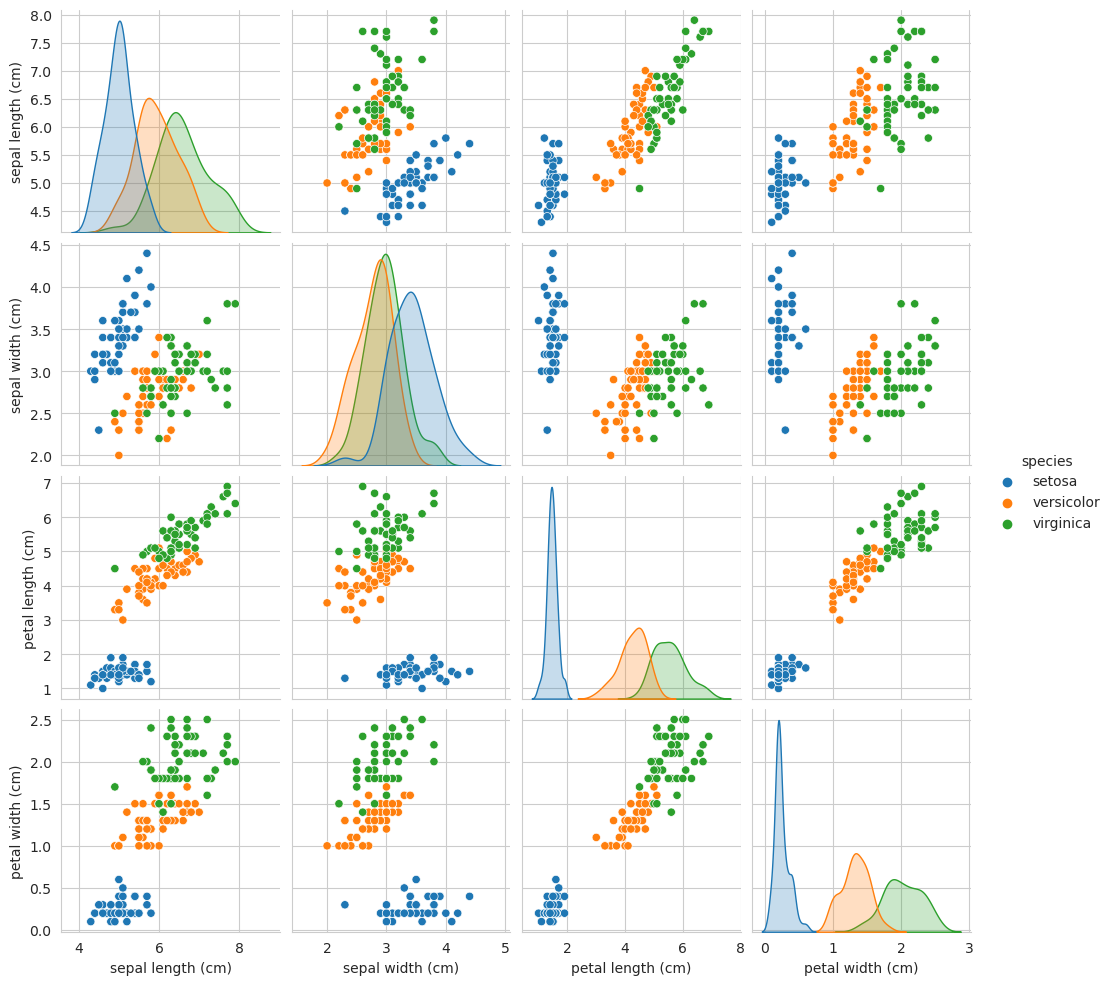

In [19]:
# The following snippet uses Seaborn function pairplot to create a grid of graphs plotting each feature against
# itself and the other specified features.
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

## 15.7.3 Visualizing the Dataset with a Seaborn pairplot (cont.)
* The keyword arguments are:
	* `data`—The `DataFrame` (or two-dimensional array or list) containing the data to plot.
	* `vars`—A sequence containing the names of the variables to plot. For a `DataFrame`, these are the names of the columns to plot. Here, we use the first four `DataFrame` columns, representing the sepal length, sepal width, petal length and petal width, respectively.
	* `hue`—The `DataFrame` column that’s used to determine colors of the plotted data. In this case, we’ll color the data by **Iris** species. 

## 15.7.3 Visualizing the Dataset with a Seaborn pairplot (cont.)
* The graphs along the top-left-to-bottom-right diagonal, show the **distribution** of just the feature plotted in that column, with the range of values (left-to-right) and the number of samples with those values (top-to-bottom). 
* Other graphs in a column show **scatter plots** of the other features against the feature on the **x**-axis. 
* Interestingly, **all the scatter plots clearly separate the _Iris setosa_ blue dots from the other species’ orange and green dots**, indicating that **_Iris setosa_** is indeed in a **“class by itself.”**
* The other two species can **sometimes be confused with one another**, as indicated by the overlapping orange and green dots. 
	* It would be difficult to distinguish between these two species if we had only the sepal measurements available to us.

### Displaying the `pairplot` in One Color
* If you remove the `hue` keyword argument, `pairplot` uses only **one color** to plot all the data because it does not know how to distinguish the species: 

/home/tufan/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


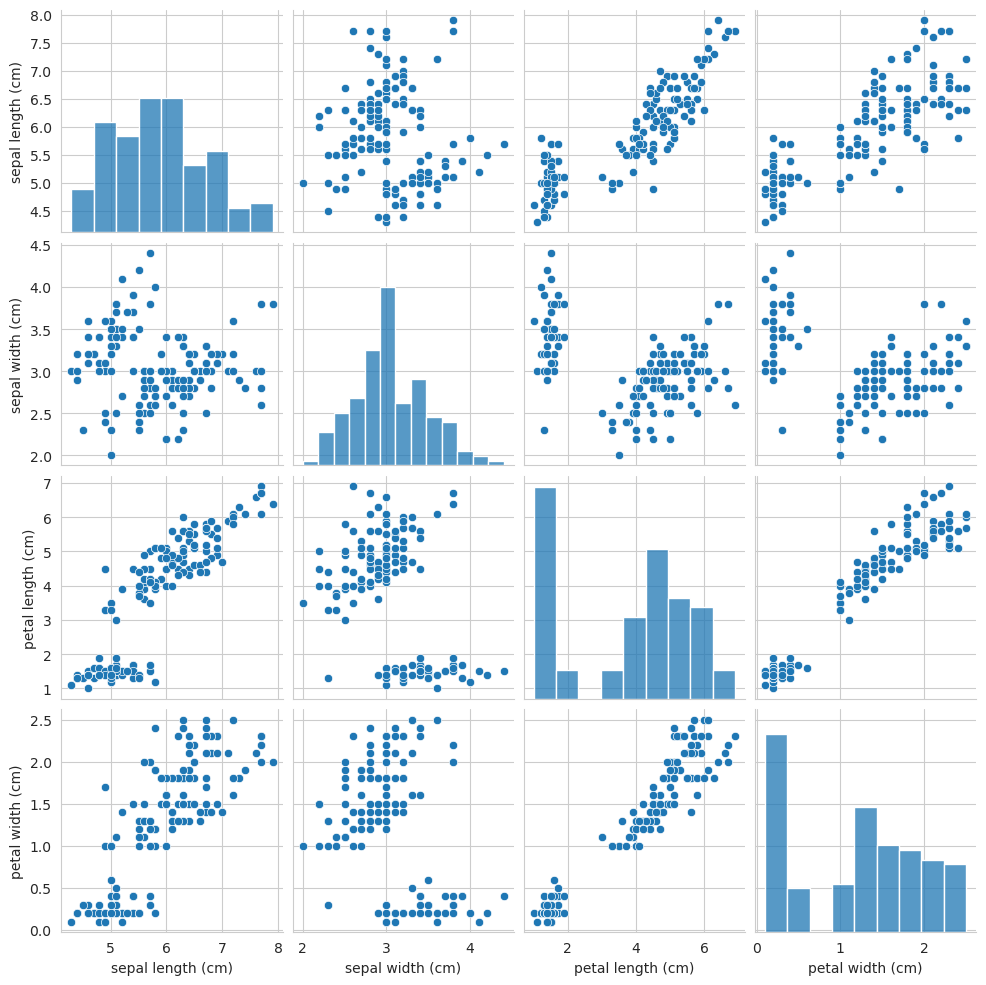

In [20]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

### Displaying the `pairplot` in One Color (cont.)
* In this case, the **graphs along the diagonal are histograms** showing the **distributions of all the values for that feature, regardless of the species**. 
* It appears that there **may be only _two_ distinct clusters**, even though for this dataset we know there are **three** species. 
	* If you do not know the number of clusters in advance, you might ask a **domain expert** who is thoroughly familiar with the data. 
	* Such a person might know that there are three species in the dataset, which would be valuable information as we try to perform machine learning on the data.
* The `pairplot` diagrams work well for a **small number of features** or a subset of features so that you have a small number of rows and columns, and for a relatively small number of samples so you can see the data points. 
* As the number of features and samples increases, each scatter plot quickly becomes too small to read. 

## 15.7.4 Using a `KMeans` Estimator
* Use k-means clustering via **`KMeans` estimator** to place each sample in the Iris dataset into a cluster

### Creating the `KMeans` Estimator 
* [`KMeans` default arguments](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* When you **train a `KMeans` estimator**, it calculates for each cluster a **centroid** representing the **cluster’s center data point** 
	* Often, you’ll rely on **domain experts** to help **choose an appropriate _k_** (`n_clusters`). 
* Can also use **hyperparameter tuning** to estimate the appropriate **k**

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, random_state=11)

### Fitting the Model Via the `KMeans` object’s `fit` Method
* When the training completes, the `KMeans` object contains: 
	* **`labels_` array** with values from **`0` to `n_clusters - 1`**, indicating the clusters to which the samples belong
	* **`cluster_centers_` array** in which **each row represents a centroid**

In [23]:
kmeans.fit(iris.data)

/home/tufan/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=11)

### Comparing the Cluster Labels to the Iris Dataset’s Target Values 
* **Iris dataset** is **labeled**, so we can look at **`target` array values** to get a sense of **how well the k-means algorithm clustered the samples** 
    * With **unlabeled data**, we’d depend on a **domain expert** to help **evaluate whether the predicted classes make sense**
* First 50 samples are **Iris setosa**, next 50 are **Iris versicolor**, last 50 are **Iris virginica**
    * **`target` array** represents these with values **0–2** 
* If **`KMeans` chose clusters perfectly**, then **each group of 50 elements in the estimator’s `labels_` array should have a distinct label**. 
    * **`KMeans` labels** are **not related** to dataset’s **`target` array** 

### Comparing the Cluster Labels to the Iris Dataset’s Target Values (cont.)
* First 50 samples should be **one cluster** 

In [24]:
print(kmeans.labels_[0:50]) # This snippet shows that the first 50 samples were all placed in cluster 1.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


* Next 50 samples should be a **second cluster** (two are not)

In [25]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


* Last 50 samples should be a **third cluster** (14 are not)

In [26]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


* Results confirm what we saw in **`pairplot` diagrams**
    * **Iris setosa** is “in a class by itself” 
    * There is confusion between **Iris versicolor** and **Iris virginica**

## 15.7.5 Dimensionality Reduction with Principal Component Analysis
* Use **`PCA` estimator** to perform dimensionality reduction from **4 to 2 dimensions**
	* [Algorithm’s details](https://scikit-learn.org/stable/modules/decomposition.html#pca) beyond scope

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2, random_state=11)

### Transforming the Iris Dataset’s Features into Two Dimensions

In [29]:
pca.fit(iris.data)  # trains estimator once

PCA(n_components=2, random_state=11)

In [30]:
iris_pca = pca.transform(iris.data)  # can be called many times to reduce data

* We'll call **`transform`** again to **reduce the cluster centroids from four dimensions to two** for plotting 
* **`transform`** returns an array with same number of rows as `iris.data`, but only two columns

In [31]:
iris_pca.shape

(150, 2)

### Visualizing the Reduced Data 
* Place reduced data in a **`DataFrame`** and **add a species column** that we’ll use to **determine dot colors**

In [32]:
iris_pca_df = pd.DataFrame(iris_pca, 
                           columns=['Component1', 'Component2'])

In [33]:
iris_pca_df['species'] = iris_df.species

* Scatterplot the data with Seaborn
* Each **centroid** in **`cluster_centers_`** array has **same number of features** (four) as dataset's samples
* **To plot centroids**, we must **reduce their dimensions**
* Think of a **centroid** as the **“average” sample in its cluster**
	* So each centroid should be **transformed** using **same `PCA` estimator** as **other samples**

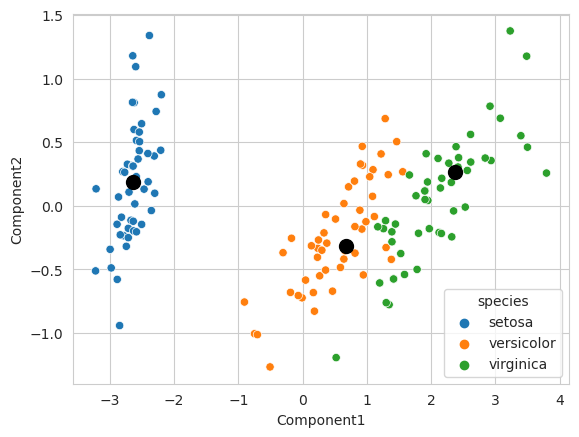

In [34]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

# reduce centroids to 2 dimensions
iris_centers = pca.transform(kmeans.cluster_centers_)

# Now, we’ll plot the centroids of the three clusters as larger black dots. 
import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

# [ : , 0 ] means [ first_row:last_row , column_0 ]. If you have a 2-dimensional list/matrix/array, 
# this notation will give you all values in column 0 (from all rows).

# The keyword argument s=100 specifies the size of the plotted points,

# and the keyword argument c='k' specifies that the points should be displayed in black.

## 15.7.6 Choosing the Best Clustering Estimator 
* **Run multiple clustering algorithms** and see **how well they cluster Iris species** 
	* We’re running `KMeans` here on the **small** Iris dataset
    * If you experience **performance problems with `KMeans`** on larger datasets, consider **`MiniBatchKMeans`**
    * Documentation indicates **`MiniBatchKMeans` is faster on large datasets** and the results are almost as good

## 15.7.6 Choosing the Best Clustering Estimator (cont.)
* For the `DBSCAN` and `MeanShift` estimators, we do **not** specify number of clusters in advance

In [35]:
from sklearn.cluster import DBSCAN, MeanShift,\
    SpectralClustering, AgglomerativeClustering

In [36]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

## 15.7.6 Choosing the Best Clustering Estimator (cont.)

In [37]:
import numpy as np

Each iteration of the following loop calls one estimator’s fit method with iris.data
as an argument, then uses NumPy’s unique function to get the cluster labels and counts for the three groups of 50 samples and displays the results. Recall that for the DBSCAN and MeanShift estimators, we did not specify the number of clusters in advance. Interestingly, DBSCAN correctly predicted three clusters (labeled -1, 0 and 1), though it placed 84 of the 100 Iris virginica and Iris versicolor samples in the same cluster. The MeanShift estimator, on the other hand, predicted only two clusters (labeled as 0 and 1), and placed 99 of the 100 Iris virginica and Iris versicolor samples in the same cluster

In [39]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0, 101, 50):
        labels, counts = np.unique(
            estimator.labels_[i:i+50], return_counts=True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')          

/home/tufan/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=2, count=50
50-100:
   label=1, count=50
100-150:
   label=0, count=35
   label=1, count=15

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


## 15.7.6 Choosing the Best Clustering Estimator (cont.)
* **`DBSCAN` correctly predicted three clusters** (labeled `-1`, `0` and `1`)
    * Placed 84 of the 100 **Iris virginica** and **Iris versicolor** in the same cluster
* **`MeanShift` predicted only two clusters** (labeled as `0` and `1`)
    * Placed 99 of 100 **Iris virginica** and **Iris versicolor** samples in same cluster

Though these algorithms label every sample, the labels simply indicate the clusters.
What do you do with the cluster information once you have it? If your goal is to use the data in supervised machine learning, typically you’d study the samples in each cluster to try to determine how they’re related and label them accordingly. As we’ll see in the next chapter, unsupervised learning is commonly used in deep-learning applications. Some examples of unlabeled data processed with unsupervised learning include tweets from Twitter, Facebook posts, videos, photos, news articles, customers’ product reviews, view-ers’ movie reviews and more.